# Bag-of-Word Matrix

In [1]:
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.cluster import KMeans
from sklearn.metrics import adjusted_rand_score

documents = ['This is the first sentence.',
             'This one is the second sentence.',
             'And this is the third one.',
             'Is this the first sentence?']

In [2]:
# import numpy as np

test = []

for sentence in documents:
    test.append(sentence.lower().split())
    
test

[['this', 'is', 'the', 'first', 'sentence.'],
 ['this', 'one', 'is', 'the', 'second', 'sentence.'],
 ['and', 'this', 'is', 'the', 'third', 'one.'],
 ['is', 'this', 'the', 'first', 'sentence?']]

In [3]:
# unique_words = set([test for word in test.split])
# for word in test:
#     set(unique_words.append[word.unique()])
    
# unique_words

AttributeError: 'list' object has no attribute 'split'

In [7]:
count_vector = CountVectorizer()
vector = count_vector.fit_transform(documents)
vector

<4x9 sparse matrix of type '<class 'numpy.int64'>'
	with 22 stored elements in Compressed Sparse Row format>

In [8]:
count_vector.get_feature_names()

['and', 'first', 'is', 'one', 'second', 'sentence', 'the', 'third', 'this']

In [9]:
vector.toarray()

array([[0, 1, 1, 0, 0, 1, 1, 0, 1],
       [0, 0, 1, 1, 1, 1, 1, 0, 1],
       [1, 0, 1, 1, 0, 0, 1, 1, 1],
       [0, 1, 1, 0, 0, 1, 1, 0, 1]], dtype=int64)

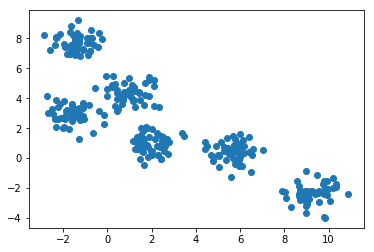

In [43]:
from sklearn.datasets.samples_generator import make_blobs
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans

X, y = make_blobs(n_samples=300, n_features = 2, centers=6,
                          random_state=0, cluster_std=0.60)

plt.scatter(X[:, 0], X[:, 1])
plt.show()

In [44]:
km = KMeans(n_clusters=4)
km.fit(X)
km.cluster_centers_

array([[-0.21722581,  3.51823129],
       [ 4.00849095,  0.61626879],
       [-1.37472707,  7.70985923],
       [ 9.30538203, -2.35144383]])

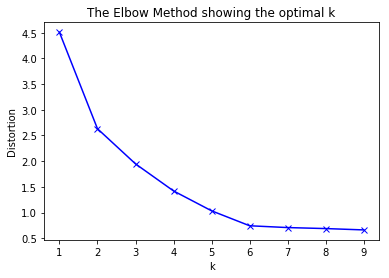

In [45]:
import numpy as np
from scipy.spatial import distance

distortions = []
K = range(1, 10)
for k in K:
    km = KMeans(n_clusters=k)
    km.fit(X)
    distortions.append(sum(np.min(distance.cdist(X, km.cluster_centers_, 'euclidean'), axis=1)) / X.shape[0])

# Plot the elbow
plt.plot(K, distortions, 'bx-')
plt.xlabel('k')
plt.ylabel('Distortion')
plt.title('The Elbow Method showing the optimal k')
plt.show()

In [46]:
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.cluster import KMeans
from sklearn.metrics import adjusted_rand_score

documents = ["This little kitty came to play when I was eating at a restaurant.",
             "Merley has the best squooshy kitten belly.",
             "Google Translate app is incredible.",
             "If you open 100 tab in google you get a smiley face.",
             "Best cat photo I've ever taken.",
             "Climbing ninja cat.",
             "Impressed with google map feedback.",
             "Key promoter extension for Google Chrome."]

vectorizer = TfidfVectorizer(stop_words='english')
X = vectorizer.fit_transform(documents)
print(vectorizer.get_feature_names())
print(X.shape)
true_k = 2
model = KMeans(n_clusters=true_k, init='k-means++')
model.fit(X)

['100', 'app', 'belly', 'best', 'came', 'cat', 'chrome', 'climbing', 'eating', 'extension', 'face', 'feedback', 'google', 'impressed', 'incredible', 'key', 'kitten', 'kitty', 'little', 'map', 'merley', 'ninja', 'open', 'photo', 'play', 'promoter', 'restaurant', 'smiley', 'squooshy', 'tab', 'taken', 'translate', 've']
(8, 33)


KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
    n_clusters=2, n_init=10, n_jobs=1, precompute_distances='auto',
    random_state=None, tol=0.0001, verbose=0)